kmeans dbscan meanshift

In [2]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, MeanShift

In [5]:
df = pd.read_csv("clear_data.csv")

In [6]:
df = df.drop(["Unnamed: 0"], axis=1)

In [9]:
dfk = df.drop(["readmitted"], axis=1)

In [15]:
from sklearn.decomposition import PCA 

In [16]:
dfk.shape

(71515, 35)

In [17]:
pca = PCA(n_components=2)

In [18]:
pca_feat = pca.fit_transform(dfk)

In [19]:
pca_feat.shape

(71515, 2)

# KMeans

In [20]:
kmeans = KMeans(n_clusters=2, random_state=0, init="k-means++")

In [21]:
kmeans.fit(dfk)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [27]:
kmeans_pred = kmeans.fit_predict( dfk)

In [24]:
import matplotlib.pyplot as plt

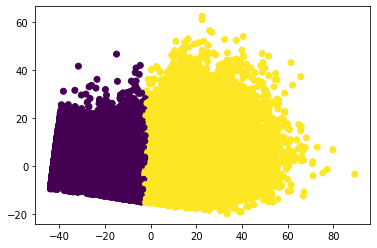

In [28]:
plt.scatter(pca_feat[:,0], pca_feat[:,1], c = kmeans_pred)

# DBSCAN

In [29]:
dbs = DBSCAN()

In [30]:
dbs.fit(dfk)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [31]:
dbs_pred = dbs.fit_predict(dfk)

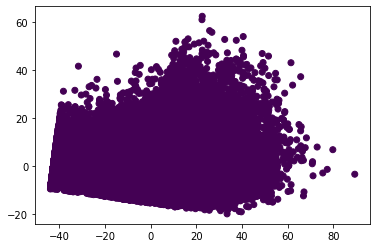

In [32]:
plt.scatter(pca_feat[:,0], pca_feat[:,1], c = dbs_pred)

# MeanShift

In [36]:
mshift = MeanShift()

In [39]:
dff = dfk.iloc[:2000]

In [40]:
mshift.fit(dff)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

In [41]:
pred_msh = mshift.fit_predict(dff)

In [44]:
pca2 = PCA(n_components=2)

In [45]:
pca_feat_2 = pca.fit_transform(dff)

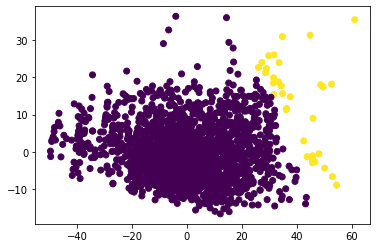

In [47]:
plt.scatter(pca_feat_2[:,0], pca_feat_2[:,1], c = pred_msh)